In [0]:
dbutils.fs.ls('/FileStore/tables')

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019/', name='clinicaltrial_2019/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019.csv', name='clinicaltrial_2019.csv', size=42400056, modificationTime=1650102313000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019_csv.gz', name='clinicaltrial_2019_csv.gz', size=10060669, modificationTime=1649091155000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020/', name='clinicaltrial_2020/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020_csv.gz', name='clinicaltrial_2020_csv.gz', size=10981608, modificationTime=1649091285000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021/', name='clinicaltrial_2021/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021.csv', name='clinicaltrial_2021.csv', size=50359696, modificationTime=1652353022000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2

In [0]:
fileroot= "clinicaltrial_2021_csv"
fileroot2="clinicaltrial_2021.csv"
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".gz","file:/tmp/")
import os
os.environ["fileroot"] = fileroot
os.environ["fileroot2"] = fileroot2

In [0]:
%sh
gzip  -d /tmp/$fileroot.gz
mv /tmp/$fileroot /tmp/$fileroot2
ls /tmp

Rserv
Rtmp8asMoZ
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2021.csv
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
ipykernel-connection-ReplId-13c06-3eacb-53df4-4.json
ipykernel-connection-ReplId-3073c-3bf8b-1bfcd-0.json
ipykernel-connection-ReplId-5296f-a2fa3-3357e-b.json
systemd-private-652a58decda84c93b7891feb4f7fd15f-apache2.service-KpcqYg
systemd-private-652a58decda84c93b7891feb4f7fd15f-ntp.service-NU8hKf
systemd-private-652a58decda84c93b7891feb4f7fd15f-systemd-logind.service-llRiyg
systemd-private-652a58decda84c93b7891feb4f7fd15f-systemd-resolved.service-HXe2Mh
tmp.jZmaWbUmeu


In [0]:
dbutils.fs.cp('file:/tmp/'+fileroot2, '/FileStore/tables/'+ fileroot2)

Out[4]: True

In [0]:
dbutils.fs.head('/FileStore/tables/'+ fileroot2)

[Truncated to first 65536 bytes]
Out[5]: "Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions\r\nNCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||\r\nNCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|\r\nNCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|\r\nNCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|\r\nNCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|\r\nNCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate\r\nNCT02752438|Ankara University|Unkn

In [0]:
RDDclinical= sc.textFile('/FileStore/tables/'+ fileroot2)
RDDclinical.take(2)

Out[6]: ['Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions',
 'NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||']

In [0]:
RDDmesh= sc.textFile('/FileStore/tables/mesh.csv')
RDDmesh.take(4)

Out[7]: ['term,tree',
 'Calcimycin,D03.633.100.221.173',
 'A-23187,D03.633.100.221.173',
 'Temefos,D02.705.400.625.800']

In [0]:
RDDpharma=sc.textFile('/FileStore/tables/pharma.csv')
RDDpharma.take(1)

Out[8]: ['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"']

In [0]:
clinicalheader= RDDclinical.first()
CTRDD= RDDclinical.filter(lambda line: line!=clinicalheader)
CTRDD.take(4)

Out[9]: ['NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|']

In [0]:
SplitCTline= CTRDD.map(lambda line: line.split('|'))
SplitCTline.take(1)

Out[10]: [['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  '']]

Answer 1

In [0]:
SplitCTline.count()

Out[11]: 387261

Question 2 Data Processing

In [0]:
Reduced_RDD= SplitCTline.map(lambda x: (x[5],int(1)))\
.reduceByKey(lambda a,b:a+b)\
.sortBy(lambda x: x[1], ascending= False)

In [0]:
Reduced_RDD.collect()

Out[13]: [('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

Answer 2

In [0]:
def Text(data):
    return ' '.join(str(d) for d in data)
clinicallines=Reduced_RDD.map(Text)

for i in clinicallines.collect():
    print(i)

Interventional 301472
Observational 77540
Observational [Patient Registry] 8180
Expanded Access 69


Question 3 Data Processing

In [0]:
Cond_RDD= SplitCTline.map(lambda x: (x[7]))\
.flatMap(lambda x:x.split(','))\
.filter(lambda x: x not in [''])\
.map(lambda x: (x,1))\
.reduceByKey(lambda a,b:a+b)\
.sortBy(lambda x: x[1], ascending= False)

In [0]:
Cond_RDD.take(5)

Out[16]: [('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

Answer 3

In [0]:
Cond_RDDlines=Cond_RDD.map(Text)

Cond_RDDlines.take(5)
for i in Cond_RDDlines.take(5):
    print(i)

Carcinoma 13389
Diabetes Mellitus 11080
Neoplasms 9371
Breast Neoplasms 8640
Syndrome 8032


Question 4 Data Processing

In [0]:
meshheader= RDDmesh.first()
MRDD= RDDmesh.filter(lambda line: line!=meshheader)
MRDD.take(4)

Out[18]: ['Calcimycin,D03.633.100.221.173',
 'A-23187,D03.633.100.221.173',
 'Temefos,D02.705.400.625.800',
 'Temefos,D02.705.539.345.800']

In [0]:
Splitmeshline= MRDD.map(lambda line: line.split(','))
Splitmeshline.take(5)

Out[19]: [['Calcimycin', 'D03.633.100.221.173'],
 ['A-23187', 'D03.633.100.221.173'],
 ['Temefos', 'D02.705.400.625.800'],
 ['Temefos', 'D02.705.539.345.800'],
 ['Temefos', 'D02.886.300.692.800']]

In [0]:
JoinClinicalMesh= Cond_RDD.join(Splitmeshline)
JoinClinicalMesh.take(4)

Out[20]: [('Syndrome', (8032, 'C23.550.288.500')),
 ('Lymphoma', (5395, 'C04.557.386')),
 ('Lymphoma', (5395, 'C15.604.515.569')),
 ('Lymphoma', (5395, 'C20.683.515.761'))]

Answer 4

In [0]:
Roots=JoinClinicalMesh.map(lambda x: (x[1]))\
.map(lambda x: (x[1],x[0]))\
.map(lambda x: (x[0].split('.')[0],x[1]))\
.reduceByKey(lambda x,y: x+y )\
.sortBy(lambda x: x[1], ascending= False)
Roots.take(5)

Out[21]: [('C04', 143994),
 ('C23', 136079),
 ('C01', 106674),
 ('C14', 94523),
 ('C10', 92310)]

In [0]:
Root= Roots.map(Text)

Root.collect()
for i in Root.take(5):
    print(i)

C04 143994
C23 136079
C01 106674
C14 94523
C10 92310


Question 5 Data Processing

In [0]:
pharmaheader= RDDpharma.first()
pharmaRDD= RDDpharma.filter(lambda line: line!=pharmaheader)
pharmaRDD.take(1)

Out[23]: ['"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s carotid, biliary and peripheral vascular products.","federal","agency action","Justice Department Civil Division","civil","","","","","","","","","","","","USA","Illinois","publicly traded","ABT","pharmaceuticals","pharmaceuticals","https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians",""']

In [0]:
Splitpharmaline= pharmaRDD.map(lambda line: line.replace('"','').split(',')[1])\
.map(lambda x: (x,1))\
.reduceByKey(lambda x,y: x+y )
Splitpharmaline.take(2)

Out[24]: [('Abbott Laboratories', 26), ('AbbVie', 38)]

In [0]:
Sponsor_RDD= SplitCTline.map(lambda x: (x[1]))\
.map(lambda x: (x,1))\
.reduceByKey(lambda x,y: x+y )

In [0]:
Sponsor_RDD.take(2)

Out[26]: [('The University of Hong Kong', 757),
 ('Universidade Federal do Rio de Janeiro', 103)]

In [0]:
Joinclinicalpharma= Sponsor_RDD.subtractByKey(Splitpharmaline)\
.sortBy(lambda x: x[1], ascending= False)
Joinclinicalpharma.take(10)

Out[27]: [('National Cancer Institute (NCI)', 3218),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088),
 ('Massachusetts General Hospital', 1971),
 ('Cairo University', 1928),
 ('Hoffmann-La Roche', 1828)]

In [0]:
def Text2(data):
    return ' '+':'.join(str(d) for d in data)
JoinPC= Joinclinicalpharma.map(Text2)

JoinPC.take(10)
for i in JoinPC.take(10):
    print(i)

 National Cancer Institute (NCI):3218
 M.D. Anderson Cancer Center:2414
 Assistance Publique - Hôpitaux de Paris:2369
 Mayo Clinic:2300
 Merck Sharp & Dohme Corp.:2243
 Assiut University:2154
 Novartis Pharmaceuticals:2088
 Massachusetts General Hospital:1971
 Cairo University:1928
 Hoffmann-La Roche:1828


Question 6 Data Processing and Answer

In [0]:
MonthRDD= SplitCTline.map(lambda x: (x[2],x[4]))\
.filter(lambda x: '2021' in x[1])\
.filter(lambda x: 'Completed' in x[0])\
.map(lambda x: (x[1],1))\
.reduceByKey(lambda x,y: x+y)\
.map(lambda x: (x[0].split(' ')[0],x[1]))\
.sortByKey(ascending=False)
MonthRDD.take(10)

Out[29]: [('Sep', 528),
 ('Oct', 187),
 ('May', 984),
 ('Mar', 1227),
 ('Jun', 1094),
 ('Jul', 819),
 ('Jan', 1131),
 ('Feb', 934),
 ('Aug', 700),
 ('Apr', 967)]

In [0]:
import calendar
y = {i:e for e, i  in enumerate(calendar.month_abbr[1:],1)}

#{'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

MonthRDD2= MonthRDD.sortBy(lambda x: y.get(x[0]))

In [0]:
MonthRDD3= MonthRDD2.map(Text)

MonthRDD3.collect()
for i in MonthRDD3.collect():
    print(i)

Jan 1131
Feb 934
Mar 1227
Apr 967
May 984
Jun 1094
Jul 819
Aug 700
Sep 528
Oct 187


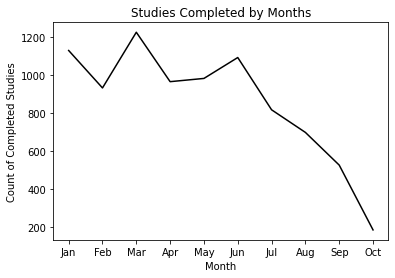

In [0]:
import matplotlib.pyplot as p
#get data
x=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]
y=[1131,934,1227,967,984,1094,819,700,528,187]
#plot the data
p.plot(x,y, color='Black')
#Include titles
p.title("Studies Completed by Months")
#show labels
p.xlabel("Month")
p.ylabel("Count of Completed Studies")
p.show()

Additional Analysis

Find out the top 10 sponsors and the number of trials sponsored

In [0]:
Most_Sponsor= Sponsor_RDD.sortBy(lambda x: x[1], ascending= False)
Most_Sponsor.take(10)

Out[33]: [('GlaxoSmithKline', 3378),
 ('National Cancer Institute (NCI)', 3218),
 ('AstraZeneca', 2691),
 ('Pfizer', 2645),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088)]

In [0]:
Most_Sponsor2= Most_Sponsor.map(Text2)

Most_Sponsor2.take(10)
for i in Most_Sponsor2.take(10):
    print(i)

 GlaxoSmithKline:3378
 National Cancer Institute (NCI):3218
 AstraZeneca:2691
 Pfizer:2645
 M.D. Anderson Cancer Center:2414
 Assistance Publique - Hôpitaux de Paris:2369
 Mayo Clinic:2300
 Merck Sharp & Dohme Corp.:2243
 Assiut University:2154
 Novartis Pharmaceuticals:2088


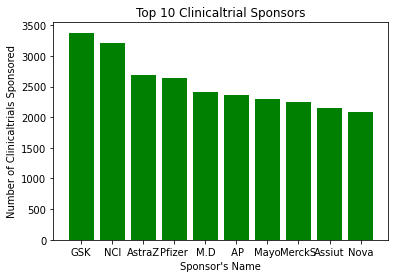

In [0]:
#get data
x=["GSK","NCI","AstraZ","Pfizer","M.D"," AP","Mayo","MerckS","Assiut","Nova"]
y=[3378,3218,2691,2645, 2414, 2369, 2300, 2243, 2154, 2088]
#plot the data
p.bar(x,y, color='Green')
#Include titles
p.title("Top 10 Clinicaltrial Sponsors")
#show labels
p.xlabel("Sponsor's Name")
p.ylabel("Number of Clinicaltrials Sponsored")
p.show()

Top 5 most frequently fined Pharmaceuticals

In [0]:
Fined_RDD= pharmaRDD.map(lambda line: line.split('"')[3])\
.map(lambda x: (x,1))\
.reduceByKey(lambda a,b:a+b)\
.sortBy(lambda x: x[1], ascending= False)
Fined_RDD.take(5)

Out[36]: [('Merck', 78),
 ('Pfizer', 71),
 ('Johnson & Johnson', 59),
 ('Teva Pharmaceutical Industries', 53),
 ('AbbVie', 49)]

In [0]:
Finedpharma= Fined_RDD.map(Text)

Finedpharma.take(5)
for i in Finedpharma.take(5):
    print(i)

Merck 78
Pfizer 71
Johnson & Johnson 59
Teva Pharmaceutical Industries 53
AbbVie 49


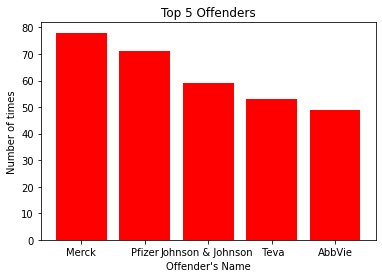

In [0]:
#get data
x=["Merck","Pfizer","Johnson & Johnson ", " Teva","AbbVie"]
y=[78, 71, 59, 53, 49]
#plot the data
p.bar(x,y, color='Red')
#Include titles
p.title("Top 5 Offenders")
#show labels
p.xlabel("Offender's Name")
p.ylabel("Number of times")
p.show()

Find out the types of offenses committed by pharmaceutical companies and frequency of committing the offences

In [0]:
Offence_RDD= pharmaRDD.map(lambda line: line.split('"')[15])\
.map(lambda x: (x,1))\
.reduceByKey(lambda a,b:a+b)\
.sortBy(lambda x: x[1], ascending= False)
Offence_RDD.take(10)

Out[39]: [('government-contracting-related offenses', 281),
 ('environment-related offenses', 202),
 ('safety-related offenses', 128),
 ('healthcare-related offenses', 128),
 ('competition-related offenses', 103),
 ('employment-related offenses', 72),
 ('consumer-protection-related offenses', 29),
 ('financial offenses', 24),
 ('miscellaneous offenses', 1)]

In [0]:
Offence_Group= Offence_RDD.map(Text2)

Offence_Group.collect()
for i in Offence_Group.collect():
    print(i)

 government-contracting-related offenses:281
 environment-related offenses:202
 safety-related offenses:128
 healthcare-related offenses:128
 competition-related offenses:103
 employment-related offenses:72
 consumer-protection-related offenses:29
 financial offenses:24
 miscellaneous offenses:1


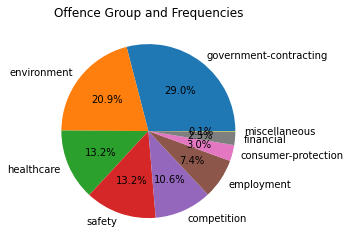

In [0]:
import numpy as np
#get data
Labels=["government-contracting","environment","healthcare","safety","competition","employment","consumer-protection","financial","miscellaneous"]
y=np.array([281,202,128,128,103,72,29,24,1])
#plot the data
p.pie(y, labels=Labels,autopct= '%1.1f%%')
#Include titles
p.title("Offence Group and Frequencies")
p.show()